# Final Project Program
## Ayush Jadia
### Roll_No : 22b0407
## Saurabh Neerat
### Roll_No : 22b2122
## Adithya Dileep
### Roll_No : 22b2204


### link to the project demonstraion and ipynb file:
https://drive.google.com/drive/folders/1P1m5LxZ3xu0QAQ9bra_XDOfAeHRG_4dn?usp=drive_link

importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf


# loading data

In [2]:
# To load a CSV file from a raw link:
import requests
import pandas as pd

# 'url_to_csv' is the actual URL of the CSV file
url_to_csv = 'https://raw.githubusercontent.com/ayushjadia/Drought_Occurence_Prediction_in_Montana/master/cleaned_data.csv?token=GHSAT0AAAAAACRR2PJUIBN2C45PKRQV7A2SZRWETSA'

response = requests.get(url_to_csv)

# if the request was successful
if response.status_code == 200:
    # To read the content of the response into a pandas DataFrame
    df = pd.read_csv(url_to_csv)
    # Now we can work with 'df', which contains the data from the CSV file
    print(df.head())  # TO see first few data rows
else:
    print("Failed to fetch CSV:", response.status_code)

   Unnamed: 0     fips        date   PRECTOT         PS      QV2M        T2M  \
0           0  30001.0  2000-01-07  1.941429  78.851429  1.980000 -10.382857   
1           1  30001.0  2000-01-14  2.212857  78.897143  2.667143  -7.305714   
2           2  30001.0  2000-01-21  0.237143  79.078571  2.170000  -9.975714   
3           3  30001.0  2000-01-28  0.817143  79.181429  1.748571 -12.887143   
4           4  30001.0  2000-02-04  0.497143  79.670000  2.764286  -6.821429   

      T2MDEW     T2MWET   T2M_MAX  ...   None   D0   D1   D2   D3   D4  \
0 -11.461429 -11.432857 -4.555714  ...  100.0  0.0  0.0  0.0  0.0  0.0   
1  -8.472857  -8.455714 -2.548571  ...  100.0  0.0  0.0  0.0  0.0  0.0   
2 -10.610000 -10.600000 -2.838571  ...  100.0  0.0  0.0  0.0  0.0  0.0   
3 -13.450000 -13.447143 -4.922857  ...  100.0  0.0  0.0  0.0  0.0  0.0   
4  -7.684286  -7.667143 -0.904286  ...  100.0  0.0  0.0  0.0  0.0  0.0   

   ValidStart    ValidEnd  StatisticFormatID  DSCI  
0  04-01-2000  10-01-

In [3]:
# Unnamed columns has been falsely added during loading of raw data from github therefore we need to remove it:
# this is a false index with unnamed column
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [4]:
# Sample of our data
df

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,DSCI
0,30001.0,2000-01-07,1.941429,78.851429,1.980000,-10.382857,-11.461429,-11.432857,-4.555714,-15.307143,...,100.0,0.0,0.0,0.0,0.0,0.0,04-01-2000,10-01-2000,1.0,0.0
1,30001.0,2000-01-14,2.212857,78.897143,2.667143,-7.305714,-8.472857,-8.455714,-2.548571,-13.185714,...,100.0,0.0,0.0,0.0,0.0,0.0,11-01-2000,17-01-2000,1.0,0.0
2,30001.0,2000-01-21,0.237143,79.078571,2.170000,-9.975714,-10.610000,-10.600000,-2.838571,-14.751429,...,100.0,0.0,0.0,0.0,0.0,0.0,18-01-2000,24-01-2000,1.0,0.0
3,30001.0,2000-01-28,0.817143,79.181429,1.748571,-12.887143,-13.450000,-13.447143,-4.922857,-18.477143,...,100.0,0.0,0.0,0.0,0.0,0.0,25-01-2000,31-01-2000,1.0,0.0
4,30001.0,2000-02-04,0.497143,79.670000,2.764286,-6.821429,-7.684286,-7.667143,-0.904286,-13.235714,...,100.0,0.0,0.0,0.0,0.0,0.0,01-02-2000,07-02-2000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45478,30111.0,2016-11-25,0.174286,87.912857,3.077143,2.297143,-4.611429,-4.542857,8.174286,-1.474286,...,100.0,0.0,0.0,0.0,0.0,0.0,22-11-2016,28-11-2016,1.0,0.0
45479,30111.0,2016-12-02,0.221429,88.071429,2.617143,-1.142857,-6.740000,-6.632857,3.075714,-4.050000,...,100.0,0.0,0.0,0.0,0.0,0.0,29-11-2016,05-12-2016,1.0,0.0
45480,30111.0,2016-12-09,0.747143,88.595714,1.334286,-10.831429,-14.940000,-14.531429,-6.305714,-14.255714,...,100.0,0.0,0.0,0.0,0.0,0.0,06-12-2016,12-12-2016,1.0,0.0
45481,30111.0,2016-12-16,2.010000,88.367143,1.331429,-12.171429,-14.970000,-14.721429,-7.288571,-17.250000,...,100.0,0.0,0.0,0.0,0.0,0.0,13-12-2016,19-12-2016,1.0,0.0


## since our data is of different counties in which the data has been taken for the same time period therefore we need to first make a county wise data frame and then merge those datasets to form our final datasets

In [5]:
import pandas as pd

# Extract the FIPS column (adjust the column name if needed)
fips_col = "fips"
fips_values = df[fips_col].unique()  # Get unique FIPS values

# Create a list to store separate DataFrames
fips_dataframes = []

# Loop through each unique FIPS value
for fips in fips_values:
  # Filter data for the current FIPS value
  fips_data = df[df[fips_col] == fips]
  # Append the filtered DataFrame to the list
  fips_dataframes.append(fips_data)

In [6]:
# there are around 850 rows for each of the county therefore each seperate datasets wil contain around 850 rows as we can see
fips_dataframes[0].shape

(851, 33)

In [7]:
# From the correlation Heat map and previous EDA we decided to trim those features that are not necesary to get some selected features:
selected_features = ['PRECTOT', 'PS', 'QV2M', 'T2M','T2M_RANGE','WS10M', 'WS10M_MAX',
       'WS10M_MIN','WS10M_RANGE', 'WS50M', 'WS50M_MIN',
       'WS50M_RANGE','DSCI']

## defining some configurational parameters we will take previous 50 inputs which corresponds to (50 weeks of data) to predict the 3rd week from now(Fututre =3) split fraction of 0.7 is used.

In [8]:
past = 50
future = 3
learning_rate = 0.001
batch_size = 64
epochs = 20
split_fraction = 0.7
step=1


## defing normalization and configuration function:

In [9]:
def normalize(data, train_split):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    return (data - data_mean) / data_std

def configuration(data_f):
  train_split = int(split_fraction * int(data_f.shape[0]))
  features = data_f[selected_features]
  features = normalize(features.values, train_split)
  features = pd.DataFrame(features)
  features.head()
  train_data = features.loc[0 : train_split - 1]
  val_data = features.loc[train_split:]
  return train_data,val_data,train_split,features




## Making of seperate datasets for each county

In [10]:
train_data = []
val_data = []
train_split=[]
features=[]

for i in range(len(fips_dataframes)):
    train, val,train_s,feat = configuration(fips_dataframes[i])
    train_data.append(train)
    val_data.append(val)
    train_split.append(train_s)
    features.append(feat)


In [11]:
train_data[55]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.295874,-0.219384,-0.821039,-0.999252,-1.394392,0.284934,-0.070804,0.225264,-0.290818,0.648084,0.190898,0.712331,-0.865217
1,-0.651496,0.141150,-0.980110,-1.060217,-1.066990,-1.140839,-1.142539,-0.739091,-0.972280,-0.871749,-0.791402,-0.475883,-0.865217
2,-0.717239,0.784960,-1.087451,-1.135209,-0.889813,-1.203787,-1.621200,-0.881247,-1.516470,-0.989703,-0.709274,-1.560092,-0.865217
3,-0.297497,1.930942,-0.814572,-0.829826,-0.858371,0.668917,1.104834,0.200290,1.379338,0.850590,0.435122,0.732277,-0.865217
4,0.985330,-1.408286,-0.896695,-1.057718,-1.061999,-0.333530,-0.876356,-0.137810,-1.112822,-0.681770,-0.341857,-1.216735,-0.865217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,-0.621154,0.883678,-0.638688,-0.409455,-0.179110,0.646886,1.020777,0.240632,1.220820,0.925746,0.442686,1.266546,-0.865217
580,-0.083411,-0.592794,-0.950365,-0.833853,-0.780014,0.056747,-0.236585,-0.178152,-0.176423,0.150172,-0.069536,-0.406072,-0.865217
581,-0.198040,-1.073505,-1.185739,-1.210618,-1.223205,0.749176,1.088490,-0.362570,1.832012,0.689838,-0.026311,0.793540,-0.865217
582,-0.806582,0.381506,-0.658734,-0.618599,-1.453285,2.078954,1.469084,2.442127,-0.019540,2.269170,2.456994,-0.066989,-0.865217


In [12]:
val_data[55]

,0,1,2,3,4,5,6,7,8,9,10,11,12
584,-0.820068,0.733455,-1.014382,-1.173955,-0.993125,0.316408,0.052947,0.849597,-0.648708,0.307792,0.831716,-1.067140,-0.865217
585,-0.774553,0.810712,-0.915447,-1.075910,-1.184276,0.610690,0.826977,0.250237,0.944640,0.755600,0.104447,1.362002,-0.865217
586,-0.761068,1.295716,-0.985930,-1.025499,-0.980148,2.198555,1.995611,2.121316,0.988763,2.351634,2.423495,-0.259326,-0.865217
587,-0.253668,-0.004780,-0.711111,-0.760250,-0.996618,2.618734,3.114044,2.129000,2.549427,2.756644,2.270044,1.658343,-0.865217
588,-1.032467,1.085405,-0.777714,-0.734836,-1.227697,1.767361,1.251935,2.805201,-0.634000,2.097980,2.484010,-1.203913,-0.865217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,-0.847039,-1.300985,-0.696238,-0.656234,-1.079467,1.554911,1.082653,1.752479,0.027852,1.706540,1.888579,-0.944614,-0.865217
831,-0.791411,-0.824565,-0.904454,-0.990642,-1.962855,1.054474,0.900528,1.696769,-0.184594,1.246205,1.951256,-1.215311,-0.865217
832,-0.171069,0.750623,-1.485130,-1.932484,-1.674381,-1.159724,-1.420396,-0.687223,-1.398807,-1.525194,-1.048594,-1.176843,-0.865217
833,1.319101,0.063893,-1.486424,-2.062747,-0.972163,0.733439,-0.087149,1.318327,-1.243558,0.505078,0.893312,-1.698289,-0.865217


In [13]:
x_train=[]
y_train=[]
for i in range(len(fips_dataframes)):
  start = past + future
  end = start + train_split[i]
  x_train.append(train_data[i][[i for i in range(13)]].values)
  y_train.append(features[i].iloc[start:end][[12]])
  sequence_length = int(past)


In [14]:
x_train[0].shape

(595, 13)

In [15]:
y_train[0].shape

(595, 1)

In [16]:
dataset_train=[]
for i in range(len(fips_dataframes)):
  dataset_t = keras.preprocessing.timeseries_dataset_from_array(
      x_train[i],
      y_train[i],
      sequence_length=sequence_length,
      sampling_rate=1,
      batch_size=batch_size,
  )
  dataset_train.append(dataset_t)

In [17]:
len(dataset_train)

56

## now we will  concetenate our dataset to a single datasets for training and validation our model

In [18]:
import tensorflow as tf

# Concatenate the datasets into a single dataset
concatenated_dataset_train = dataset_train[0]
for dataset_t in dataset_train[1:]:
    concatenated_dataset_train = concatenated_dataset_train.concatenate(dataset_t)


In [19]:
for batch in concatenated_dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (64, 50, 13)
Target shape: (64, 1)


# for val dataset

In [20]:
dataset_val=[]
for i in range(len(fips_dataframes)):

  x_end= len(val_data[i]) - past - future
  label_start = train_split[i] + past + future
  x_val = val_data[i].iloc[:x_end][[i for i in range(13)]].values
  y_val = features[i].iloc[label_start:][[12]]

  dataset_v = keras.preprocessing.timeseries_dataset_from_array(
      x_val,
      y_val,
      sequence_length=sequence_length,
      sampling_rate=step,
      batch_size=batch_size,
  )
  dataset_val.append(dataset_v)


In [21]:
import tensorflow as tf

# Assuming dataset_train is already defined as per your code

# Concatenate the datasets into a single dataset
concatenated_dataset_val = dataset_val[0]
for dataset_t in dataset_val[1:]:
    concatenated_dataset_val = concatenated_dataset_val.concatenate(dataset_t)


# Creating Model

In [22]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 13)]          0         
                                                                 
 lstm (LSTM)                 (None, 32)                5888      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5921 (23.13 KB)
Trainable params: 5921 (23.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training our model

In [23]:
path_checkpoint = "model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    concatenated_dataset_train,
    epochs=epochs,
    validation_data=concatenated_dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/20
488/489 [============================>.] - ETA: 0s - loss: 0.3842
Epoch 1: val_loss improved from inf to 0.11245, saving model to model_checkpoint.weights.h5
489/489 [==============================] - 23s 43ms/step - loss: 0.3840 - val_loss: 0.1125
Epoch 2/20
489/489 [==============================] - ETA: 0s - loss: 0.2180
Epoch 2: val_loss improved from 0.11245 to 0.10116, saving model to model_checkpoint.weights.h5
489/489 [==============================] - 18s 37ms/step - loss: 0.2180 - val_loss: 0.1012
Epoch 3/20
489/489 [==============================] - ETA: 0s - loss: 0.1855
Epoch 3: val_loss did not improve from 0.10116
489/489 [==============================] - 20s 41ms/step - loss: 0.1855 - val_loss: 0.1018
Epoch 4/20
488/489 [============================>.] - ETA: 0s - loss: 0.1648
Epoch 4: val_loss did not improve from 0.10116
489/489 [==============================] - 19s 40ms/step - loss: 0.1647 - val_loss: 0.1050
Epoch 5/20
489/489 [==========================

# Final Model Accuracy

## Plot of loss V/S epoch

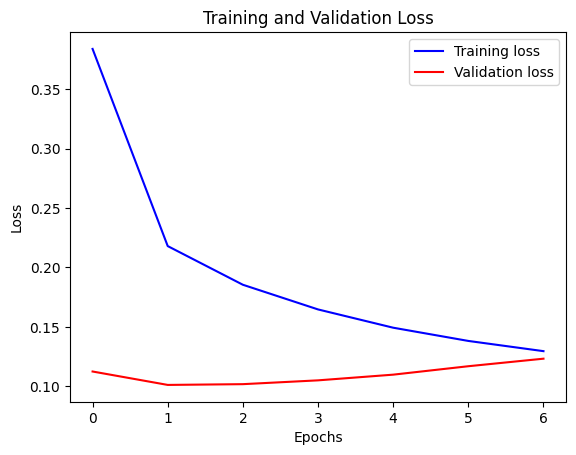

In [24]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    return val_loss[-1]

final_loss=visualize_loss(history, "Training and Validation Loss")

### Final Loss Value

In [25]:
# we can take the final loss of validation as our final metrics of our model
print(f"Loss value for our model is : {final_loss}")

Loss value for our model is : 0.1232387125492096


### Plot for different rows :

2/2 [==============================] - 1s 10ms/step


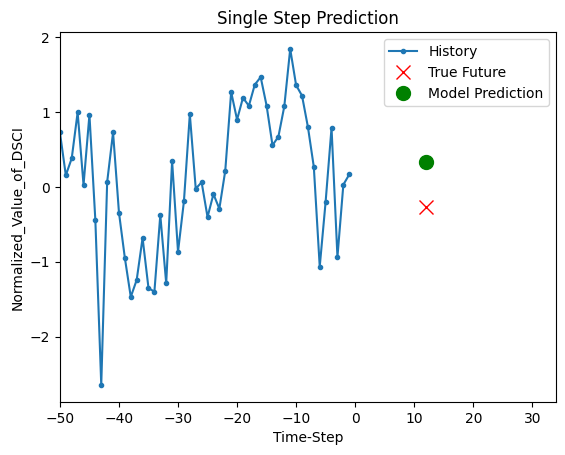

2/2 [==============================] - 0s 11ms/step


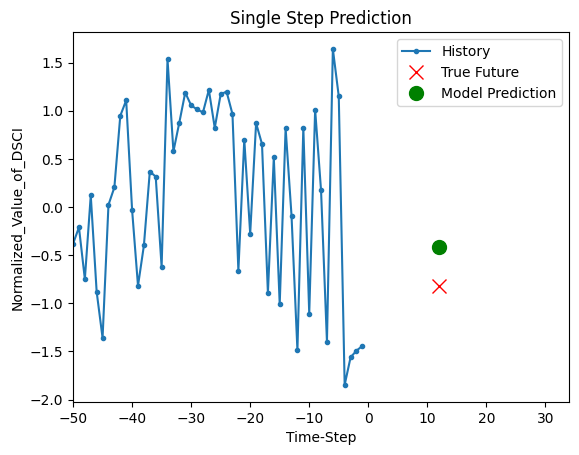

1/1 [==============================] - 0s 443ms/step


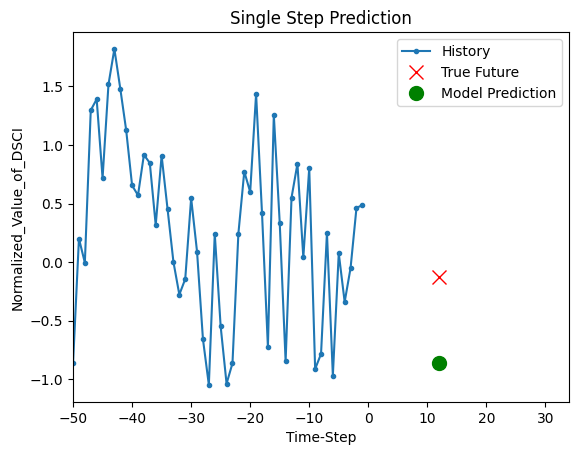

2/2 [==============================] - 0s 12ms/step


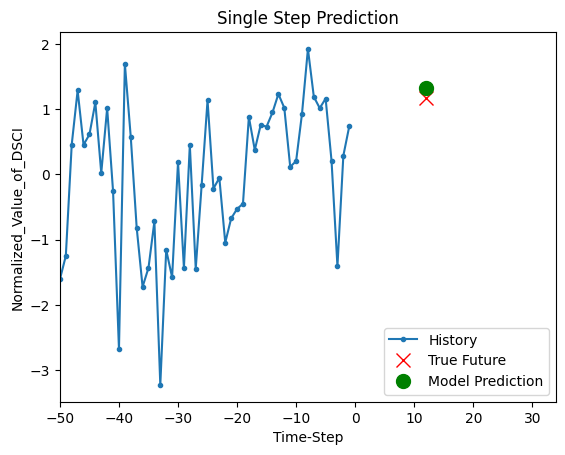

2/2 [==============================] - 0s 15ms/step


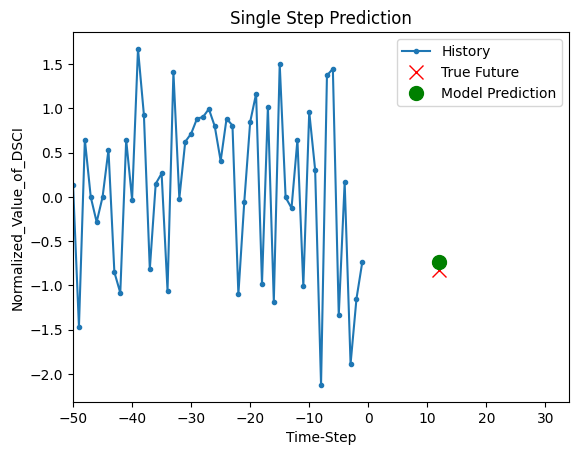

1/1 [==============================] - 0s 25ms/step


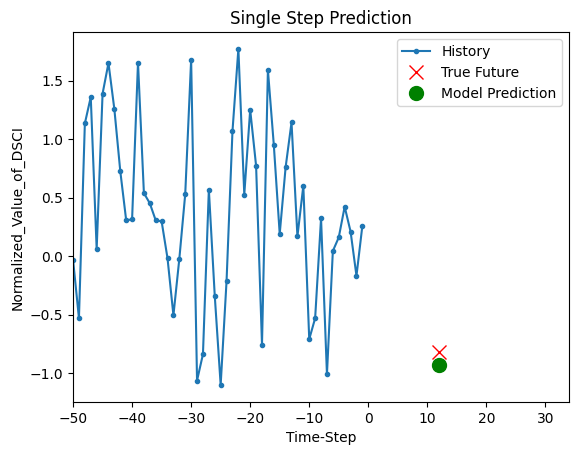

2/2 [==============================] - 0s 13ms/step


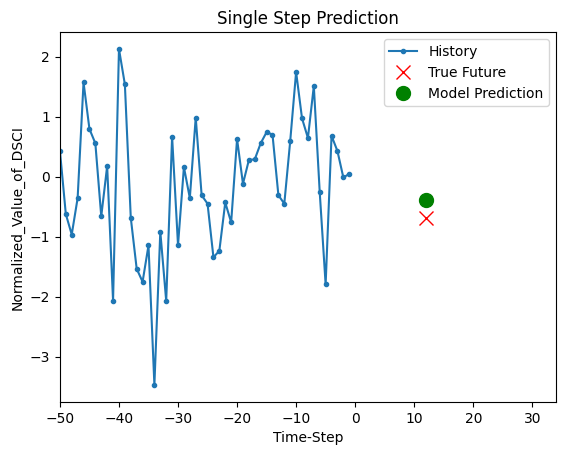

2/2 [==============================] - 0s 13ms/step


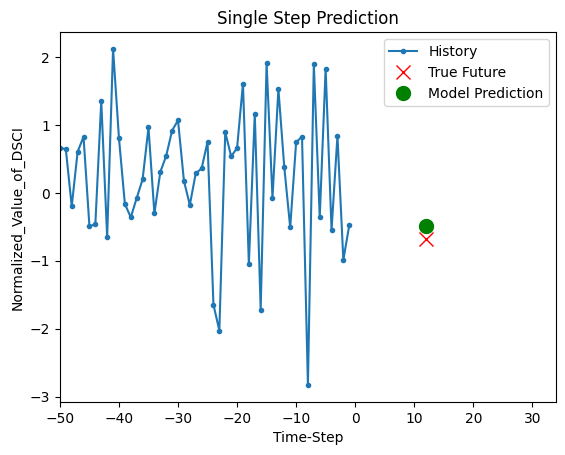

1/1 [==============================] - 0s 25ms/step


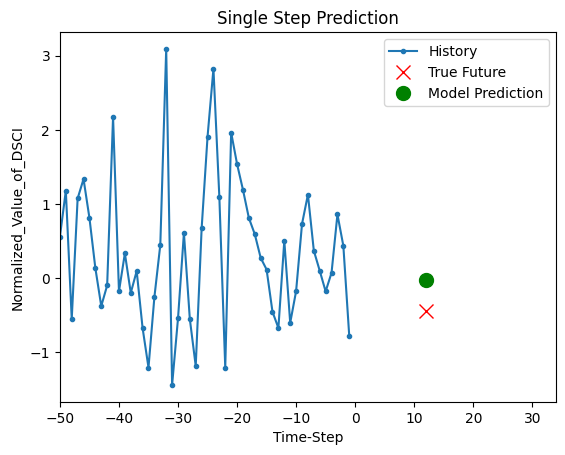

2/2 [==============================] - 0s 12ms/step


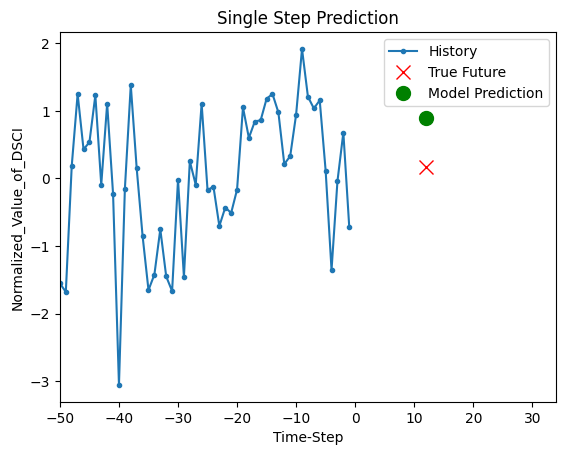

2/2 [==============================] - 0s 11ms/step


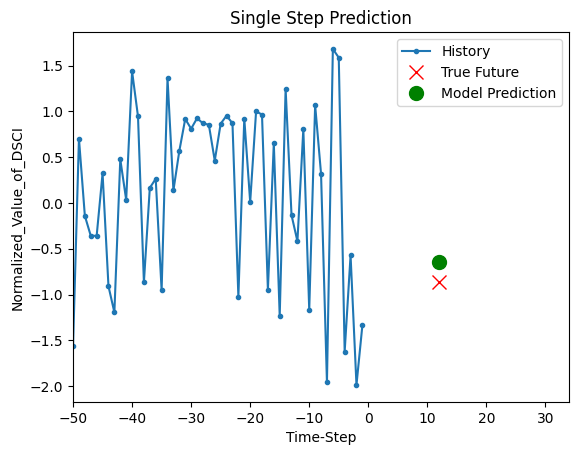

1/1 [==============================] - 0s 24ms/step


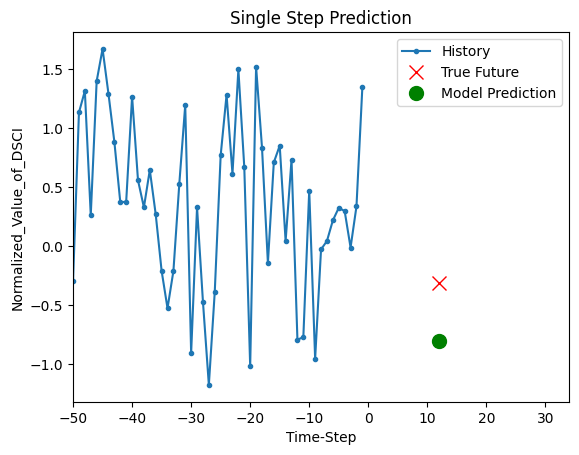

2/2 [==============================] - 0s 13ms/step


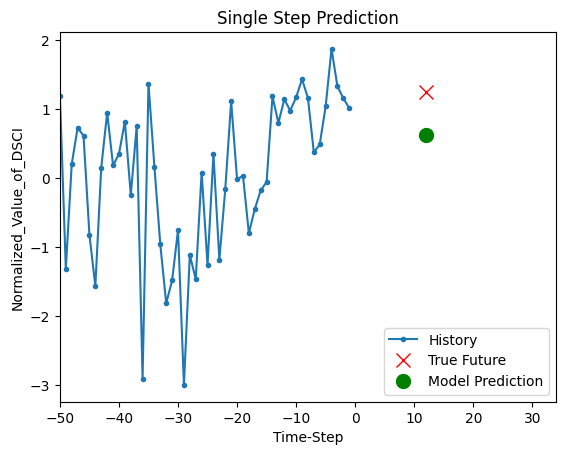

2/2 [==============================] - 0s 15ms/step


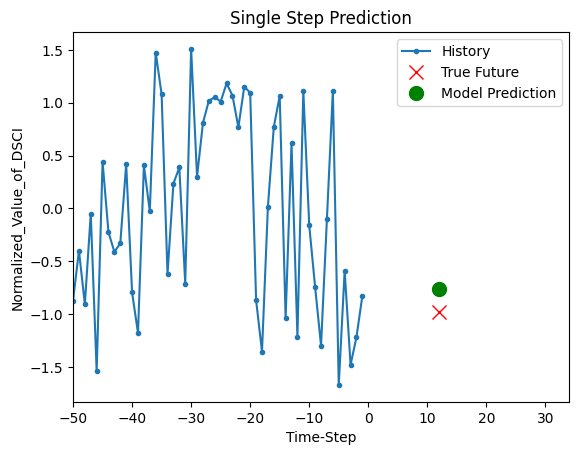

1/1 [==============================] - 0s 23ms/step


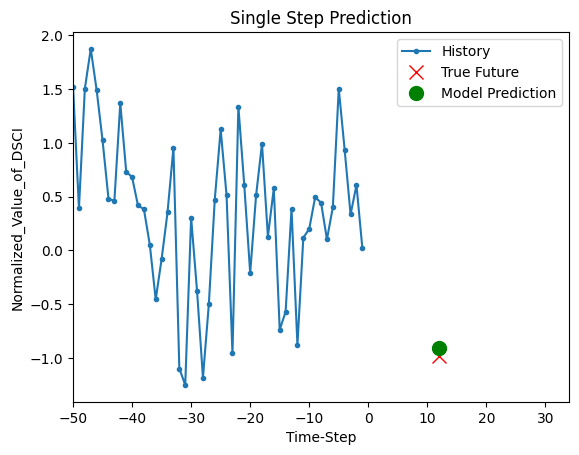

2/2 [==============================] - 0s 10ms/step


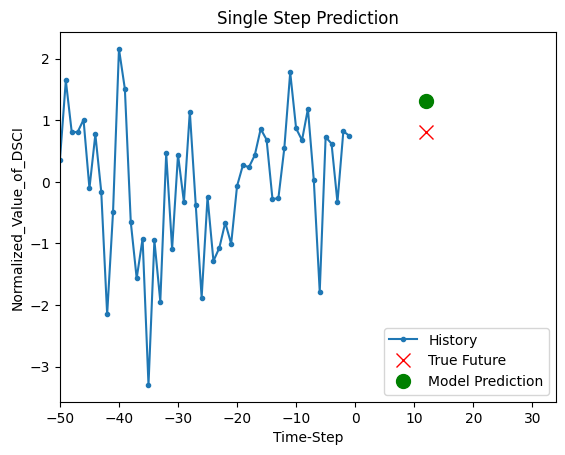

2/2 [==============================] - 0s 11ms/step


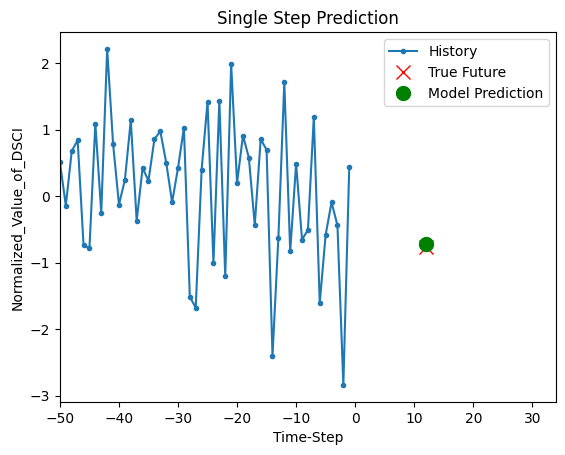

1/1 [==============================] - 0s 37ms/step


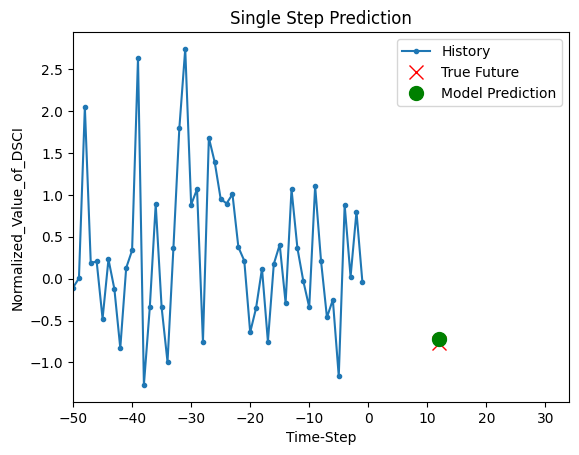

2/2 [==============================] - 0s 13ms/step


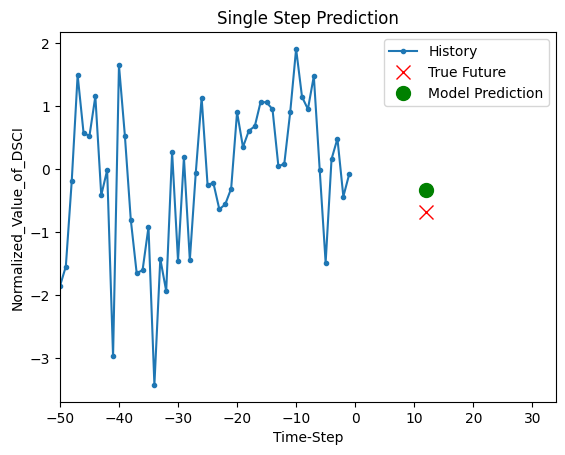

2/2 [==============================] - 0s 16ms/step


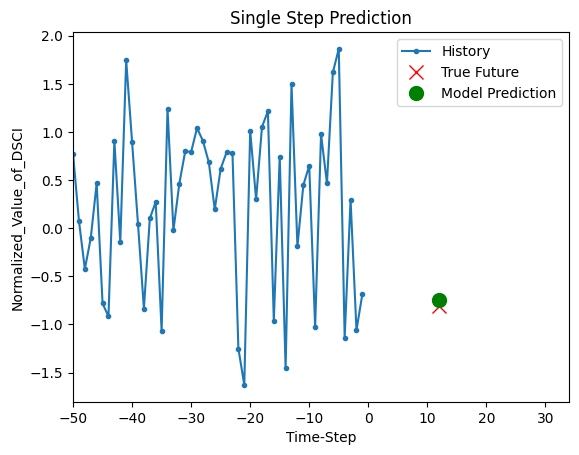

In [26]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.ylabel("Normalized_Value_of_DSCI")
    plt.show()
    return


for x, y in concatenated_dataset_val.take(20):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )

# Thank You